In [1]:
import requests
from bs4 import BeautifulSoup
import os 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [3]:
import random
user_agent_list = [
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
"Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
"Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
"Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
"Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
]
UA = random.choice(user_agent_list)
headers = {'User-Agent': UA}
page_html = requests.get("http://space.bilibili.com/20165629/#!/video?keyword=&order=senddate&page=1&tid=0",headers = headers)
soup_html = BeautifulSoup(page_html.text,'lxml')
#这个不可以用伪装法取得
#必须要Seleuinm

In [11]:
#Selenium大法
list_links = []
title = []
click = []
time_b = []
import time
driver = webdriver.Chrome()
driver.implicitly_wait(30) 
driver.get("http://space.bilibili.com/20165629/#!/video?keyword=&order=senddate&page=1&tid=0")
for i in (range(8)):
    time.sleep(3)
    html_soup = BeautifulSoup(driver.page_source,'lxml')
    link_title = html_soup.find("div",{'id':'submit-video-list'}).find_all('a',class_ = "title")
    link_click = html_soup.find("div",{'id':'submit-video-list'}).find_all('span',class_ = 'play')
    link_time = html_soup.find("div",{'id':'submit-video-list'}).find_all('span',class_ = 'time')
    title.extend(link_title)
    click.extend(link_click)
    time_b.extend(link_time)
    
    elem_blil = driver.find_element_by_class_name("sp-pager-next")
    elem_blil.click()
    #for i in range(1):
    #title = (link_title[0].get("title"))
    #click = (link_click[0].get_text())
    #time = (link_time[0].get_text())
    #zip_content = zip(title,click,time) 
    #links_single_page = html_soup.find("div",{"id":"submit-video-list"}).find_all("a",class_ = "cover")
    #list_links.extend(list(links_single_page))
    

In [12]:
a = list(map(lambda x:x.get_text(),title))
b = list(map(lambda x:x.get_text(),click))
c = list(map(lambda x:x.get_text(),time_b))

In [13]:
import pandas as pd
import numpy as np
general_data = pd.DataFrame(list(zip(a,b,c)),columns = ["title","click",'time'])

In [14]:
general_data

,title,click,time
0,【羡慕-小曾】全网MV首发 让别人的羡慕真正来自心底,6160,7小时前
1,你没看错，这首《一带一路》的确是首老挝歌曲,1.6万,8小时前
2,海南酷炫90岁阿婆，既会玩泥巴又会唱民谣【了不起的匠人第二季-01】,4484,9小时前
3,【前方高能】绝对不是美国大片！,5.6万,1天前
4,是什么让美国沉默，局座老泪纵横！【向上工厂】,3万,2天前
5,敢不敢和共青团中央一起搞事情？,4.6万,2天前
6,有人把航母命名为“皮皮虾号”？【国防部例行记者会 0428】,43.7万,3天前
7,《海峡两岸》两集 20170425-26 国产航母下水 比辽宁舰强在哪？,4.8万,4天前
8,张艺兴：努力努力再努力！【青年发展大家谈】,1.1万,4天前
9,那些年，除了奋斗我一无所有【中国好青年】,5246,4天前


In [15]:
click_clean_1 = list(map(lambda x:float(x[0]), general_data.click.str.split("万")))
click_clean_2 = []

for i in click_clean_1:
    if i <= 100:
        k = i * 10000
        click_clean_2.append(k)
    else:
        click_clean_2.append(i)

In [16]:
general_data["click"] = click_clean_2

In [17]:
import time
print(str(time.localtime().tm_mon) + '-' + str(time.localtime().tm_mday))

5-1


In [18]:
time_clean = general_data.time[3:].str.split("天")

In [19]:
time_clean_2 = []
for i in time_clean:
    if len(i) == 2:
        time_clean_2.append(i[0])
    else:
        time_clean_2.append(i[0])
time_clean_3 = []
for i in time_clean_2:
    try:
        k = int(i)
        k = 31 - k
        if k < 10:
            k = "04" + "-" + str("0" + str(k))
        else:
            k = "04" + "-" + str(k)
        time_clean_3.append(k)
    except:
        time_clean_3.append(i)

In [27]:
general_data['time'][3:] = time_clean_3

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
top_3 = list(map(str,general_data.time[0:3]))
top_3 = list(map(lambda x:"04-" + str(x), top_3))

In [29]:
general_data['time'][0:3] = top_3

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
time = list(map(lambda x:"2017-" + x,general_data['time']))
general_data["time"] = time
#general_data['click']

In [35]:
general_data["time"][0:3] = "2017-05-01"

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [39]:
total_num = general_data['click'].sum()
print(total_num)

25718282.0


In [43]:
general_data.to_pickle("CLY.pickle")

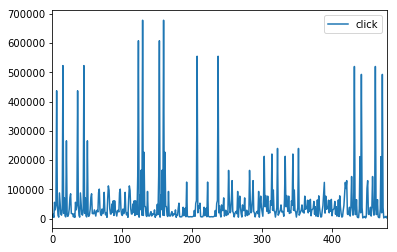

In [44]:
import matplotlib.pyplot as plt
general_data.plot()
plt.show()

In [142]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

# Create a trace
trace = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    mode = 'markers',
    marker= dict(size= 14,
                 line= dict(width=1),
                 opacity= 0.3),
                 text= general_data['title']) # The hover text goes here... 

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [52]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

# Create a trace
trace1 = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    text= general_data['title']
)

trace2 = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    mode = 'markers',
    marker= dict(size= 14,
                 line= dict(width=1),
                 opacity= 0.3),
                 text= general_data['title']) # The hover text goes here... 

data = [trace1,trace2]
py.iplot(data, filename='mixed-model')

In [68]:
with open("title.txt",'w') as f:
    for line in general_data['title']:
        f.write(line + "\n")

In [74]:
list_title = []
with open("title.txt",'r') as f:
    for line in f.readlines():
        list_title.append(line)

list_segwords = []
list_segkeywords = []
import jieba
import jieba.analyse

for line in list_title:
    seg_list = jieba.cut(line,cut_all = False)
    list_segwords.append((" ".join(seg_list)))
    
    tags = jieba.analyse.extract_tags(line, topK=3)
    list_segkeywords.append("".join(tags))

In [87]:
import time            
import re            
import os    
import sys  
import codecs  
import shutil  
from sklearn import feature_extraction    
from sklearn.feature_extraction.text import TfidfTransformer    
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == "__main__":
    corpus = []
    for line in open("segwords.txt",'r').readlines():
        print(line)
        corpus.append(line.strip())
    time.sleep(5)
    
    vectorizer = CountVectorizer()
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(vectorizer.fit_transform(corpus))
    word = vectorizer.get_feature_names()
    weight = tfidf.toarray()

【 羡慕 - 小 曾 】 全网 MV 首发   让 别人 的 羡慕 真正 来自 心底 

你 没 看错 ， 这首 《 一带 一路 》 的确 是 首 老挝 歌曲 

海南 酷炫 90 岁 阿婆 ， 既会 玩 泥巴 又 会 唱 民谣 【 了不起 的 匠人 第二季 - 01 】 

【 前方 高能 】 绝对 不是 美国 大片 ！ 

是 什么 让 美国 沉默 ， 局座 老泪纵横 ！ 【 向上 工厂 】 

敢不敢 和 共青团中央 一起 搞 事情 ？ 

有人 把 航母 命名 为 “ 皮皮虾 号 ” ？ 【 国防部 例行 记者会   0428 】 

《 海峡两岸 》 两集   20170425 - 26   国产 航母 下水   比 辽宁 舰强 在 哪 ？ 

张艺兴 ： 努力 努力 再 努力 ！ 【 青年 发展 大家 谈 】 

那些 年 ， 除了 奋斗 我 一无所有 【 中国 好 青年 】 

热烈祝贺 首艘 国产 航母 下水 圆满成功 

中国 第二艘 航空母舰 下水 仪式 

没有 知识产权 的 恐怖 世界 

《 防务 新 观察 》   20170422 - 23   日本 竭力 推动 半岛 开战   “ 趁火打劫 ” 包藏祸心 ？ 

【 赵毛熊 】 从 清水 富美加 引退 ， 看 日本 邪教 “ 幸福 科学 ” 的 无孔不入 

【 局座 泪奔 完整版 】 外敌 说 我们 还 能 抵抗 ， 可公知 大 V 说 我们 … … 

【 这 一周   第 ⑤ 集 】 这周 的 新闻 有喜有忧 ， 我们 都 要 理性 对待 

万众 期待 中国 首艘 国产 航母 下水 《 海峡两岸 》 5 集     20170419 - 23 

我们 为什么 要 发展 航天 科技 ？ 

航天 日 为什么 是 今天 ？ 

局座 含泪 感叹 ： 我们 受 了 多少 窝囊气 才 有 今天 

【 MVP 收割 者 】 朱婷 欧冠 女排 大显神威 

黄菡 老师 给 你 发 了 一条 恋爱 寄语 ，   需者 立入 ， 非诚 勿扰 

看 不 明白 错过机会 ？ 没关系 ！ 团团 给 你 翻译 新闻联播 。 

【 无邪 旺 】 有 一种 造谣 叫 “ 轮子功 ” 

海军 治好 了 我 的 火力 不足 恐惧症 

一个 跳绳 我 竟然 看 了 三分钟 … … 

致敬 ！ 中国 

In [90]:
resName = "Bilibili_Result.txt"  
result = codecs.open(resName, 'w', 'utf-8')  
for j in range(len(word)):  
    result.write(word[j] + ' ')  
result.write('\r\n\r\n')

for i in range(len(weight)):  
    print(u"-------这里输出第",i,u"类文本的词语tf-idf权重------")    
    for j in range(len(word)):  
        result.write(str(weight[i][j]) + ' ')  
    result.write('\r\n\r\n')  
result.close()

-------这里输出第 0 类文本的词语tf-idf权重------
-------这里输出第 1 类文本的词语tf-idf权重------
-------这里输出第 2 类文本的词语tf-idf权重------
-------这里输出第 3 类文本的词语tf-idf权重------
-------这里输出第 4 类文本的词语tf-idf权重------
-------这里输出第 5 类文本的词语tf-idf权重------
-------这里输出第 6 类文本的词语tf-idf权重------
-------这里输出第 7 类文本的词语tf-idf权重------
-------这里输出第 8 类文本的词语tf-idf权重------
-------这里输出第 9 类文本的词语tf-idf权重------
-------这里输出第 10 类文本的词语tf-idf权重------
-------这里输出第 11 类文本的词语tf-idf权重------
-------这里输出第 12 类文本的词语tf-idf权重------
-------这里输出第 13 类文本的词语tf-idf权重------
-------这里输出第 14 类文本的词语tf-idf权重------
-------这里输出第 15 类文本的词语tf-idf权重------
-------这里输出第 16 类文本的词语tf-idf权重------
-------这里输出第 17 类文本的词语tf-idf权重------
-------这里输出第 18 类文本的词语tf-idf权重------
-------这里输出第 19 类文本的词语tf-idf权重------
-------这里输出第 20 类文本的词语tf-idf权重------
-------这里输出第 21 类文本的词语tf-idf权重------
-------这里输出第 22 类文本的词语tf-idf权重------
-------这里输出第 23 类文本的词语tf-idf权重------
-------这里输出第 24 类文本的词语tf-idf权重------
-------这里输出第 25 类文本的词语tf-idf权重------
-------这里输出第 26 类文本的词语tf-idf权重------
-------这里输出

In [135]:
from sklearn.cluster import KMeans  
clf = KMeans(n_clusters = 6)  
s = clf.fit(weight)  
#print(clf.labels_)  
i = 1
list_types = []
while i <= len(clf.labels_):  
    list_types.append(clf.labels_[i-1])
    i = i + 1

In [136]:
general_data['classification'] = list_types
general_data[general_data["classification"] == 2]

,title,click,time,classification
134,【大结局】热血尖兵 27 - 28,11000.0,2017-03-31,2
137,热血尖兵 24 - 26（明日完结）,12000.0,2017-03-30,2
139,热血尖兵 22-23,9532.0,2017-03-29,2
142,热血尖兵 20-21集,9202.0,2017-03-28,2
148,热血尖兵 18-19集,12000.0,2017-03-24,2
149,热血尖兵 16-17集,12000.0,2017-03-23,2
164,【大结局】热血尖兵 27 - 28,11000.0,2017-03-31,2
167,热血尖兵 24 - 26（明日完结）,12000.0,2017-03-30,2
169,热血尖兵 22-23,9532.0,2017-03-29,2
172,热血尖兵 20-21集,9202.0,2017-03-28,2


In [144]:
general_data.to_pickle("general_data.pickle")
general_data.to_csv("general_data.csv")

,title,click,time,classification
0,【羡慕-小曾】全网MV首发 让别人的羡慕真正来自心底,6160.0,2017-05-01,0
1,你没看错，这首《一带一路》的确是首老挝歌曲,16000.0,2017-05-01,0
2,海南酷炫90岁阿婆，既会玩泥巴又会唱民谣【了不起的匠人第二季-01】,4484.0,2017-05-01,0
3,【前方高能】绝对不是美国大片！,56000.0,2017-04-30,0
4,是什么让美国沉默，局座老泪纵横！【向上工厂】,30000.0,2017-04-29,0
5,敢不敢和共青团中央一起搞事情？,46000.0,2017-04-29,0
6,有人把航母命名为“皮皮虾号”？【国防部例行记者会 0428】,437000.0,2017-04-28,0
7,《海峡两岸》两集 20170425-26 国产航母下水 比辽宁舰强在哪？,48000.0,2017-04-27,3
8,张艺兴：努力努力再努力！【青年发展大家谈】,11000.0,2017-04-27,1
9,那些年，除了奋斗我一无所有【中国好青年】,5246.0,2017-04-27,1


In [143]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

# Create a trace
trace = go.Scatter(
    x = general_data['time'],
    y = general_data['click'],
    mode = 'markers',
    marker= dict(size = 9,
                 color = general_data['classification'],
                 line= dict(width=1),
                 opacity= 1),
                 text= general_data['title']) # The hover text goes here... 

data = [trace]
# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [138]:
with open("segwords.txt",'w') as f:
    for i in list_segwords:
        f.write(i)

In [13]:
list_videos = []
with open("list_videos.txt","r") as f:
    for i in f.readlines():
        i = i.strip("\n")
        list_videos.append(i)

In [14]:
test_page = requests.get("http://" + list_videos[1])

In [47]:
list_total = []

In [41]:
import time

driver_1 = webdriver.Chrome()
driver_1.implicitly_wait(30) 
driver_1.get("http://" + list_videos[1])
driver_1.implicitly_wait(30)
time.sleep(5)
test = driver_1.page_source

soup_test = BeautifulSoup(test,'lxml')
list_text = soup_test.find_all("p",class_= "text")
list_primary = list(map(lambda x:x.get_text(),list_text))
list_total.extend(list_primary)

['(ー_ー)!!跟随官方老司机何惧查车入监狱', '我原本以为我加入了一个培养国家接班人的机构，现在我才知道原来我加入了一个传销组织(´；ω；`)', '敢！党和人民领导我们前进', '一支穿云箭，千万基佬来相见', '话说我们学校现在拼命的让我们背社/会/主/义/核/心/价/值/观/( ´_ゝ｀)墙绘上还要我写( ´_ゝ｀)', '这大概是个假的团团', '没想到你是这样的团团', '然而还是不敢搞事情', '等等我可能关注了假团团', '那个…可…可以…发…那种…色色的…让人愉悦的…视频吗(´･_･`)', '表白团团！', '只知道五月四', '(=・ω・=)假装知道五月五号什么节。', '团团搞事情吼不吼啊？兹瓷不兹瓷啊？', '大型传销组织(･∀･)', '团团在B站学坏了(｀・ω・´)', '(｀・ω・´)那个……时间是不是有点紧啊', '团团变了。(〜￣△￣)〜', '66666', '我去，我开始还以为这只是一个起了一个想被查水表名字的up主，没想到还真是官方的啊', '团团你怎么能这么萌', '我入了个什么组织？', '我今年可能入了假的团( ´_ゝ｀)我认识的团团不是这样的']


In [58]:
from lxml import etree
import re

selector = etree.HTML(test)
links = selector.xpath('//*[@id="bbComment"]/div[1]/div[2]/div[2]/span[1]/text()')
page_number = int(links[0][1:3])
print(page_number)

37


In [46]:
for i in range(3):
    elem = driver_1.find_element_by_link_text('下一页')
    elem.click()
    time.sleep(5)
    test_x = driver_1.page_source
    soup_test_x = BeautifulSoup(test_x,'lxml')
    list_text_x = soup_test_x.find_all("p",class_= "text")
    list_total.extend((list(map(lambda x:x.get_text(),list_text_x))))

['没想到你是这种团团！！！！！很好，请保持23333', '跟随党的脚步！', '中修药丸', '海峡两岸(°∀°)ﾉ', '搞事了搞事了', '简直可怕23333', '啊哈哈哈搞事情(°∀°)ﾉ', '想想我入团团课的1500字心得还没写( ´_ゝ｀)', '这才是正常的节奏，没有脱离群众啊QAQ大团子你也忒皮了', '搞事情！', '卧槽这真是要搞事啊我给你说Σ(ﾟдﾟ;)', '其实那个拜年祭就挺好的→_→', '震惊Σ(ﾟдﾟ;)', '苟！！！！苟也可以嘛ヾﾉ≧∀≦)o', '富强民主文明和谐，接下去', '那，能养苟么？(=・ω・=)', '走，跟着团团搞事去', '刚才点开发现视频没了，退出后再点又回来了，吓我一跳', '人生呐就都不知道，自己就不可以预料。我们普通人的命运啊，当然要靠自我奋斗，但是也要考虑到搞事情的行程，我们b站观众绝对不知道，我们作为一个普通的吃瓜路人怎么把我选到团团哪里搞事情去了呢，所以团团跟我吗讲话，说“我们都决定啦，你们b站观众来搞事情”，我说另请高明吧。我实在我也不是谦虚，我们只是普通的观众怎么就和团团一搞事情来了呢？但是呢，团团讲“大家已经研究决定了”，所以后来我就念了两首(原话如此)诗，叫“苟', '富强民主文明和谐自由平等公正法治爱国敬业诚信友善(=・ω・=)']
['怂(⌒▽⌒)', '厉害了，(•̀⌄•́)', '走你2333', '跟着团团走，路上多基友', '我是身经百战见的多了 不就是搞事情吗  这当然是最吼的啦 你们说吼不吼  西方的晚会见得多了 谈笑风生都没问题', '静静看各路大佬', '啊怎么样才能让团团上首页呢_(:з」∠)_苦恼', '官方搞事！最为致命', '有点像飞碟说猪叔的腔调_(:3」∠)_', '哈哈哈小编的迷之口音！', 'hhhhhhhhhhhhhhh团团好可爱', '钓鱼执法，哈哈哈哈！（开玩笑）', '那么我当然要做一点微小的贡献啦 就朗诵一首诗吧苟 阿呸 顺口了 稻花香里说 啊呸 现在是春天山不在高有林则徐水不在深有', '搞事儿！搞事儿！', '官方开车，最为致命(￣3￣)别人老司机开的是汽车团团开的是坦克车(°∀°)ﾉ稳_(:3」∠)_', '不敢。', '(〜￣△￣)〜传销能力超过丘比', '老司机等等我，活捉搞事情，没毛病(>^ω^<)喵', '可怕的官方', '朗